In [123]:
cd("/Users/michael/work/GitHub/epinets")

In [128]:
include("EpiSim.jl")

Main.EpiSim

In [85]:
using CSV
using Plots
using LightGraphs
using JLD2, FileIO
using Statistics

In [4]:
cd("/Users/michael/work/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series")

In [5]:
file="time_series_covid19_confirmed_global.csv"
allstates=["Australian Capital Territory" "New South Wales"  "Northern Territory" "Queensland" "South Australia" "Tasmania" "Victoria" "Western Australia"]

1×8 Array{String,2}:
 "Australian Capital Territory"  …  "Victoria"  "Western Australia"

In [6]:
z=[]
for state in allstates
    z=push!(z,EpiSim.getdata("Australia",state))
end

In [7]:
ddays=CSV.File(file)[1]
ddays=propertynames(ddays,4)[5:end]
ddays=String.(ddays)
ndays=length(ddays)

96

In [8]:
pops=[426709 8089526 245869 5095100 1751693 534281 6594804 2621680]

1×8 Array{Int64,2}:
 426709  8089526  245869  5095100  1751693  534281  6594804  2621680

In [9]:
#'reasonable' parameters
epiparam=Dict()
epiparam["p0"]=0.2 #a guess - tuned to match observed data 
epiparam["p2"]=1/12 #revised infection rate with distancing measure
epiparam["q"]=1/7 #"up to" two weeks
epiparam["r0"]=1/14 #about two weeks for mild, 3-6 for severe
epiparam["r2"]=1/4 #revised removal rate (now due to testing and isolation)
epiparam["nseeds"]=5 #probably too many, consider dropping.

5

In [13]:
i=8
epiparam["pop"]=Int(floor(sqrt(pops[i])))^2
epiparam["gridsize"]=Int(floor(sqrt(pops[i])))
y=z[i];

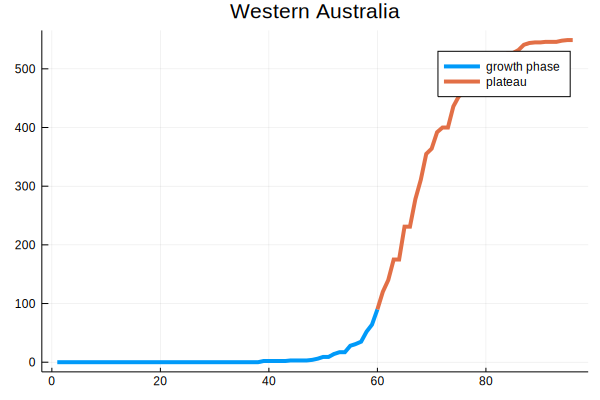

In [14]:
ddt(z,zt)=count(z->z>0, z[1:zt])+ count(z->z<0, z[zt+1:end])
~,tpday=findmax([ddt(diff(diff(y)),nx) for nx in 1:(ndays-2)])
#this is the turning point between exponential growth and decay. totItp total infections at day tpday
totItp=y[tpday+1]
plot(1:tpday+1,y[1:tpday+1],lw=4,label="growth phase",title=allstates[i])
plot!(tpday+1:ndays,y[tpday+1:ndays],lw=4,label="plateau")

In [16]:
gridsize=epiparam["gridsize"]
bamodel=barabasi_albert(gridsize^2, 3, 2)
lattice=LightGraphs.grid((gridsize,gridsize),periodic=true)
wattstrog95=watts_strogatz(gridsize^2, 4, 0.013)  #s=0.013 => 95% compliance
wattstrog90=watts_strogatz(gridsize^2, 4, 0.026)  #s=0.026 => 90% compliance
wattstrog80=watts_strogatz(gridsize^2, 4, 0.053)  #s=0.053 => 80% compliance

{2621161, 5242322} undirected simple Int64 graph

In [19]:
St90,Et90,It90,Rt90=EpiSim.episim(bamodel,wattstrog90, epiparam, totItp, tpday+2, 180, 100)

100.0%┣████████████████████████████████████████┫ 100/100 [23:45<00:00, 0.1 it/s]


(UInt64[0x000000000027fee9 0x000000000027fee9 … 0x000000000027fee9 0x000000000027fee9; 0x000000000027fee9 0x000000000027fee9 … 0x000000000027fee9 0x000000000027fee9; … ; 0x000000000027f787 0x000000000027f975 … 0x000000000027f61b 0x000000000027f87c; 0x000000000027f787 0x000000000027f975 … 0x000000000027f61b 0x000000000027f87c], UInt64[0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; … ; 0x0000000000000000 0x0000000000000000 … 0x0000000000000001 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000001 0x0000000000000000], UInt64[0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; … ; 0x0000000000000000 0x0000000000000000 … 0x0000000000000003 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000002 0x0000000000000000], UInt64[0x000000

In [20]:
St95,Et95,It95,Rt95=EpiSim.episim(bamodel,wattstrog95, epiparam, totItp, tpday+2, 180, 100)

100.0%┣████████████████████████████████████████┫ 100/100 [21:52<00:00, 0.1 it/s]


(UInt64[0x000000000027fee9 0x000000000027fee9 … 0x000000000027fee9 0x000000000027fee9; 0x000000000027fee9 0x000000000027fee9 … 0x000000000027fee9 0x000000000027fee9; … ; 0x000000000027f9a3 0x000000000027f92f … 0x000000000027fa9e 0x000000000027fa89; 0x000000000027f9a3 0x000000000027f92f … 0x000000000027fa9e 0x000000000027fa89], UInt64[0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; … ; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000], UInt64[0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; … ; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000], UInt64[0x000000

In [21]:
St80,Et80,It80,Rt80=EpiSim.episim(bamodel,wattstrog80, epiparam, totItp, tpday+2, 180, 100)

100.0%┣████████████████████████████████████████┫ 100/100 [28:52<00:00, 0.1 it/s]


(UInt64[0x000000000027fee9 0x000000000027fee9 … 0x000000000027fee9 0x000000000027fee9; 0x000000000027fee9 0x000000000027fee9 … 0x000000000027fee9 0x000000000027fee9; … ; 0x000000000027f84b 0x000000000027f98b … 0x000000000027f733 0x000000000027fa57; 0x000000000027f84b 0x000000000027f98b … 0x000000000027f733 0x000000000027fa57], UInt64[0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; … ; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000], UInt64[0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; … ; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000], UInt64[0x000000

In [22]:
using Dates 

In [23]:
df=DateFormat("d u")

dateformat"d u"

In [31]:
datadates=Date.(ddays,"m/d/y")

96-element Array{Date,1}:
 0020-01-22
 0020-01-23
 0020-01-24
 0020-01-25
 0020-01-26
 0020-01-27
 0020-01-28
 0020-01-29
 0020-01-30
 0020-01-31
 0020-02-01
 0020-02-02
 0020-02-03
 ⋮
 0020-04-15
 0020-04-16
 0020-04-17
 0020-04-18
 0020-04-19
 0020-04-20
 0020-04-21
 0020-04-22
 0020-04-23
 0020-04-24
 0020-04-25
 0020-04-26

In [38]:
plotly()
plot(datadates,y)

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /Users/michael/.julia/packages/Plots/cc8wh/src/backends.jl:363


<!DOCTYPE html>
 
 
 Plots.jl

In [80]:
plot(y)

<!DOCTYPE html>
 
 
 Plots.jl

In [76]:
function epipred(th,St,Et,It,Rt)
    #find the timestep of the threshold
    (lenp,nsims)=size(St)
    tstep=Array{Int,1}(undef,nsims)
    nbad=0
    for i in 1:nsims
        j=1
        while It[j,i]+Rt[j,i]<th
            j += 1
            if j>lenp
                j=0
                nbad += 1
                break
            end
        end
        tstep[i]=j
    end
    ndays=lenp-maximum(tstep)
    Sp=Array{UInt64,2}(undef,ndays,nsims-nbad)
    Ep=Array{UInt64,2}(undef,ndays,nsims-nbad)
    Ip=Array{UInt64,2}(undef,ndays,nsims-nbad)
    Rp=Array{UInt64,2}(undef,ndays,nsims-nbad)
    i=1
    ii=1
    while i<nsims-nbad+1
        if tstep[ii]>0
            Sp[:,i] = St[tstep[ii]:(tstep[ii]+ndays-1) ,i]
            Ep[:,i] = Et[tstep[ii]:(tstep[ii]+ndays-1) ,i]
            Ip[:,i] = It[tstep[ii]:(tstep[ii]+ndays-1) ,i]
            Rp[:,i] = Rt[tstep[ii]:(tstep[ii]+ndays-1) ,i]
            i += 1
            ii += 1
        else
            ii += 1
        end
    end
    return (Sp,Ep,Ip,Rp) 
end


epipred (generic function with 1 method)

In [89]:
(Sp,Ep,Ip,Rp) = epipred(400, St80,Et80,It80,Rt80)

(UInt64[0x000000000027fbb3 0x000000000027fc47 … 0x000000000027fbb0 0x000000000027fc0c; 0x000000000027fb7f 0x000000000027fc2a … 0x000000000027fb7e 0x000000000027fbe4; … ; 0x000000000027f787 0x000000000027f975 … 0x000000000027f628 0x000000000027f87c; 0x000000000027f787 0x000000000027f975 … 0x000000000027f628 0x000000000027f87c], UInt64[0x000000000000016a 0x000000000000010e … 0x000000000000019a 0x000000000000014a; 0x0000000000000164 0x0000000000000109 … 0x000000000000018c 0x0000000000000140; … ; 0x0000000000000000 0x0000000000000000 … 0x0000000000000003 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000003 0x0000000000000000], UInt64[0x00000000000000d1 0x0000000000000086 … 0x00000000000000df 0x00000000000000a8; 0x00000000000000d4 0x000000000000008f … 0x00000000000000d9 0x00000000000000ac; … ; 0x0000000000000000 0x0000000000000000 … 0x0000000000000001 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000001 0x0000000000000000], UInt64[0x000000

In [87]:
    function plotqnt(x,y,col,labl,qnt::Float64=0.45)
        nt,ny=size(y)
        low=Array{Float64,1}(undef,nt)
        mid=Array{Float64,1}(undef,nt)
        hig=Array{Float64,1}(undef,nt)
        for i in 1:nt
            low[i],mid[i],hig[i] = quantile(y[i,:],[0.5-qnt, 0.5, 0.5+qnt])
        end
        plot!(x,mid,grid=false,ribbon=(mid-low,hig-mid),fillalpha=.25,lw=3, seriescolor=col, label=labl)
    end

plotqnt (generic function with 4 methods)

In [92]:
lnp,~=size(Ip)
plot(y)
plotqnt(73:72+lnp,Ip+Rp,:blue,"90% Compliance")

<!DOCTYPE html>
 
 
 Plots.jl

In [98]:
th=355
tp=count(x->x<th,y)

68

In [107]:
ddt(z,zt)=count(z->z>0, z[1:zt])+ count(z->z<0, z[zt+1:end])
~,tpday=findmax([ddt(diff(diff(y)),nx) for nx in 1:(ndays-2)])
#this is the turning point between exponential growth and decay. totItp total infections at day tpday
totItp=y[tpday+1]
plot(ddays[1:tpday+1],y[1:tpday+1],lw=4,label="growth phase",title=allstates[i],size=(1200,800))
plot!(ddays[tpday+1:ndays],y[tpday+1:ndays],lw=4,label="plateau")
(Sp,Ep,Ip,Rp) = epipred(th, St80,Et80,It80,Rt80)
lnp,~=size(Ip)
plotqnt((tp+1):tp+lnp,Ip+Rp,:blue,"80% Compliance")
(Sp,Ep,Ip,Rp) = epipred(th, St90,Et90,It90,Rt90)
lnp,~=size(Ip)
plotqnt((tp+1):tp+lnp,Ip+Rp,:green,"90% Compliance")
(Sp,Ep,Ip,Rp) = epipred(th, St95,Et95,It95,Rt95)
lnp,~=size(Ip)
plotqnt((tp+1):tp+lnp,Ip+Rp,:red,"95% Compliance")

<!DOCTYPE html>
 
 
 Plots.jl

In [140]:
iso=0.95
pop=epiparam["pop"]
grd=Int(floor(sqrt(Int(floor(pop*(1-iso))))))
isosize=pop-grd^2
sg=SimpleGraph(isosize)
ws=watts_strogatz(grd^2, 4, 0.013)
isograph95=union(sg,ws)

{2490117, 262088} undirected simple Int64 graph

In [118]:
Int(floor(sqrt(Int(floor(pop*(1-iso))))))

724

In [144]:
St9x,Et9x,It9x,Rt9x=EpiSim.episim3(bamodel,wattstrog95, isograph95, epiparam, totItp, tpday+2, 1, 180, 100)

100.0%┣████████████████████████████████████████┫ 100/100 [13:43<00:00, 0.1 it/s]


(UInt64[0x000000000027fee9 0x000000000027fee9 … 0x000000000027fee9 0x000000000027fee9; 0x000000000027fee9 0x000000000027fee9 … 0x000000000027fee9 0x000000000027fee9; … ; 0x000000000027fd6d 0x000000000027fd60 … 0x000000000027f9dd 0x000000000027fb1a; 0x000000000027fd6d 0x000000000027fd60 … 0x000000000027f9dd 0x000000000027fb1a], UInt64[0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; … ; 0x0000000000000006 0x0000000000000003 … 0x0000000000000010 0x000000000000000d; 0x0000000000000006 0x0000000000000003 … 0x0000000000000010 0x000000000000000d], UInt64[0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; … ; 0x0000000000000003 0x0000000000000002 … 0x0000000000000003 0x0000000000000002; 0x0000000000000003 0x0000000000000002 … 0x0000000000000003 0x0000000000000002], UInt64[0x000000

In [153]:
ddt(z,zt)=count(z->z>0, z[1:zt])+ count(z->z<0, z[zt+1:end])
~,tpday=findmax([ddt(diff(diff(y)),nx) for nx in 1:(ndays-2)])
#this is the turning point between exponential growth and decay. totItp total infections at day tpday
totItp=y[tpday+1]
plot(ddays[1:tpday+1],y[1:tpday+1],lw=4,label="growth phase",title="Perth, Western Australia",size=(1800,1200))
plot!(ddays[tpday+1:ndays],y[tpday+1:ndays],lw=4,seriescolor=:black,label="plateau")
(Sp,Ep,Ip,Rp) = epipred(th, St80,Et80,It80,Rt80)
lnp,~=size(Ip)
plotqnt((tp+1):tp+lnp,Ip+Rp,:red,"80% distancing 21/3")
(Sp,Ep,Ip,Rp) = epipred(th, St8,Et8,It8,Rt8)
lnp,~=size(Ip)
plotqnt((tp+1):tp+lnp,Ip+Rp,:green,"80% isolating 30/3")
#(Sp,Ep,Ip,Rp) = epipred(th, St90,Et90,It90,Rt90)
#lnp,~=size(Ip)
#plotqnt((tp+1):tp+lnp,Ip+Rp,:orange,"90% distancing")
(Sp,Ep,Ip,Rp) = epipred(th, St9,Et9,It9,Rt9)
lnp,~=size(Ip)
plotqnt((tp+1):tp+lnp,Ip+Rp,:blue,"90% isolating 23/3")
#(Sp,Ep,Ip,Rp) = epipred(th, St9x,Et9x,It9x,Rt9x)
#lnp,~=size(Ip)
#plotqnt((tp+1):tp+lnp,Ip+Rp,:yellow,"95% isolating 21/3")
plot!(ddays[tpday+1:ndays],y[tpday+1:ndays],lw=4,seriescolor=:black,label=false,xlimit=(0,150),ylimit=(0,3000))



<!DOCTYPE html>
 
 
 Plots.jl